# Example analysis of cleavage rate dispersion model
Below is an example of how to load and visualize a dispersion model creates using [learn_dm](../commands/learn_dm.rst).

In [1]:
import numpy as np
import scipy.stats

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

### Load dispersion model file

Here we remotely load the the dispersion model created for human regulatory T cells

In [1]:
from footprint_tools.modeling import dispersion

dm_filepath = 'https://resources.altius.org/~jvierstra/projects/footprinting.2020/per.dataset/hTreg-DS14702/dm.json'
dm = dispersion.load_dispersion_model(dm_filepath)

print(dm.metadata)

### Plot overall model parameters

The negative binomial distrubution has two parameters: mean and variance. The dispersion model is constructed by performing a MLE fit for each predicted cleavage rate and then smoothing the parameters using a piece-wise regression. The code below plots the MLE fit paramters (blue lines) and the piece-wise regression (dashed orange).

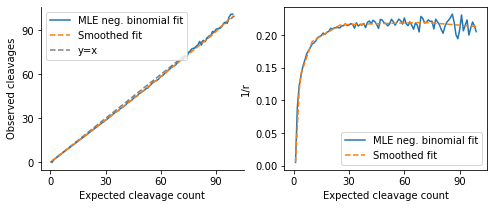

In [2]:
from footprint_tools.plotting import plot_model_fit
fig, axs = plot_model_fit(dm)
fig.set_size_inches(8, 3)

### Plot fit for a predicted cleavage rate

The code below plots the probability density for a single predicted cleavage rate. The negative binomial distribution shown (orange) is used in the statistical tests for cleavage deviation (lower-tail p-value) and for footprint likelihood functions (probability density function). A Poisson distrubution is additionally plotted to demonstrate overdispersion.

In [ ]:
from footprint_tools.plotting import plot_model_histogram

plot_model_histogram(dm)